In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Load the file
file_path = Path("Instructions/crypto_data.csv")
df = pd.read_csv(file_path)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


# Preprocessing

In [3]:
# drop cryptos that are not being traded
df = df.drop(df[df.IsTrading == False].index)

# drop the column IsTrading (because all the remaining rows are being traded)
df = df.drop('IsTrading', axis=1)

# drop all cryptos that have at least one null value
df = df.dropna()

# drop all cryptos where TotalCoinsMined < 1
df = df.drop(df[df.TotalCoinsMined < 1].index)

# drop the CoinName column
df = df.drop('CoinName', axis=1)

# rename the first column to identify what it is
df = df.rename(columns={'Unnamed: 0' : 'CoinAbbrev'})
df

,CoinAbbrev,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [4]:
# convert Algorithm and ProofType into numerical data
crypto_df = pd.get_dummies(df, columns=['Algorithm', 'ProofType'])
crypto_df


,CoinAbbrev,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,404,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ETH,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# save the CoinAbbrev column 
crypto_names = pd.DataFrame(crypto_df['CoinAbbrev'])
crypto_names

,CoinAbbrev
0,42
2,404
5,1337
7,BTC
8,ETH
...,...
1238,ZEPH
1242,GAP
1245,BDX
1246,ZEN


In [6]:
# drop the CoinAbbrev column from the dataframe
crypto_df = crypto_df.drop('CoinAbbrev', axis=1)
crypto_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# scale the data
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(crypto_df)

# Dimensionality Reduction

### PCA

In [8]:
# apply PCA to preserve 90% of the explained variance
# initialize PCA model
pca = PCA(n_components=0.90)

# get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_scaled)

In [9]:
# transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(data=crypto_pca)
df_crypto_pca

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-2.283066e-14,-1.997025e-14,7.900266e-12,-0.007129,-1.319756,-0.051813,...,-2.368958e-15,-1.445089e-15,-4.418027e-15,3.772304e-15,-3.592104e-15,-8.706285e-15,-3.133180e-15,9.597393e-16,1.975755e-15,-3.716052e-15
1,-0.318434,1.032331,-0.591126,0.001386,-2.295626e-14,-2.003594e-14,7.835457e-12,-0.007739,-1.322514,-0.056674,...,-1.116486e-15,-1.711730e-15,-4.312173e-15,3.969410e-15,-3.877941e-15,-8.881044e-15,-3.547644e-15,5.430613e-16,1.997793e-15,-3.116270e-15
2,2.305468,1.656383,-0.683617,0.004731,-3.256411e-14,-2.971927e-14,2.680680e-11,-0.054781,-1.542879,-0.943951,...,1.027446e-13,-9.066971e-15,-2.310298e-15,-8.799507e-14,9.239465e-15,1.920804e-13,6.046412e-14,3.544768e-16,-4.325937e-14,1.657590e-14
3,-0.145184,-1.320593,0.192813,-0.001229,7.310566e-15,6.192184e-15,-6.960586e-12,-0.002071,0.281463,0.251862,...,1.471950e-14,4.186262e-15,1.070382e-14,-1.352777e-14,1.961868e-15,3.440548e-14,4.677419e-15,-6.029707e-15,-1.208979e-14,2.350641e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.602225e-14,1.220564e-14,-9.659323e-12,0.027735,0.519099,0.188820,...,1.358106e-13,1.023453e-13,1.566598e-13,-2.339324e-14,-8.663380e-14,-4.885863e-14,-2.649536e-14,-4.654394e-14,-2.088812e-13,-9.403305e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,-6.528199e-15,-1.128230e-14,-4.666657e-11,-0.851713,2.041159,3.560713,...,1.800315e-14,5.575873e-15,1.402061e-14,-1.426969e-14,-2.641454e-15,3.275459e-14,1.151487e-16,-6.263445e-15,-1.170322e-14,2.017829e-16
528,-0.333144,1.032071,-0.590740,0.001399,-2.299502e-14,-2.014810e-14,7.913286e-12,-0.007154,-1.320125,-0.052460,...,-1.003550e-15,-1.496571e-15,-4.204774e-15,4.022906e-15,-3.785041e-15,-8.715105e-15,-3.223578e-15,4.688728e-16,2.064309e-15,-3.577532e-15
529,0.324349,-2.312308,0.421515,-0.001319,1.543393e-14,1.319746e-14,-7.462021e-12,0.017309,0.161077,-0.047787,...,3.861558e-14,1.579397e-14,5.791498e-14,7.296588e-15,-6.291798e-14,-9.314380e-15,-8.042659e-14,-6.754515e-15,-2.684001e-14,-3.095195e-14
530,-0.149364,-2.049336,0.412968,-0.001745,1.687891e-14,1.593595e-14,-9.877937e-12,0.028954,0.544389,0.233373,...,-4.112041e-16,-1.159743e-15,-9.868841e-16,1.285483e-15,3.261830e-15,1.954071e-16,1.364155e-15,-2.981688e-15,1.409296e-15,2.000834e-15


### Observtion: Using PCA to reduce the dimensionality to 90% of the explained variance reduced the number of features from 98 to 74. That is, 74 features (of the original 98) account for 90% of the explained variance of the crypto_scaled data.

### t-SNE

In [10]:
# further reduce the dataset dimensions with t-SNE
# Initialize t-SNE model
tsne = TSNE(learning_rate=250)

# reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pca)

# check that dimensions have been reduced to two
tsne_features.shape


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(532, 2)

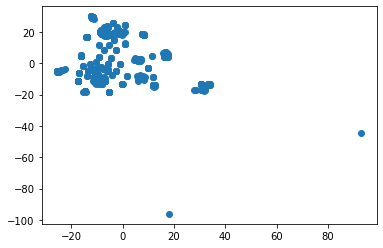

In [11]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

### Observation: t-SNE doesn't really give us distinct clusters

# Cluster Analysis with k-Means

In [12]:
# finding the best value for k
inertia = []
k = list(range(1, 11))

# calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow


,k,inertia
0,1,46979.075160
1,2,45909.857193
2,3,44845.490039
3,4,43778.700400
4,5,43052.480512
5,6,41791.798474
6,7,41503.005820
7,8,40089.757320
8,9,39713.090167
9,10,38955.589410


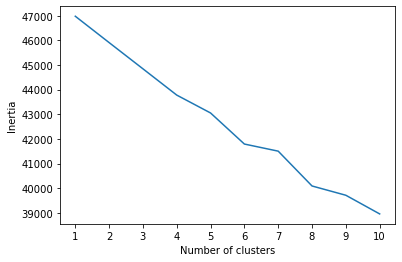

In [13]:
# plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Observation: there is no clear elbow in this data

### Recommendation: Using the information that we have created so far in the project, we cannot cluster these cryptocurrencies together.

### This does not mean that the cryptocurrency data we've been given cannot be grouped into clusters, it only means that we may need to look at how we preprocessed our data or we may need to use a different algorithm. It is still possible, however, that this data is un-clusterable. 